In [2]:
!pip install pillow



Saving 123.png to 123 (2).png
✅ Original image saved as 'original.png'
✅ Data embedded successfully into 'modified.png'
✅ Extracted Data: {
    "patient_id": "123456",
    "name": "John Doe",
    "age": 35,
    "gender": "Male",
    "date_of_visit": "2025-06-24",
    "diagnosis": "Hypertension",
    "prescription": [
        {
            "medicine_name": "Amlodipine",
            "dosage": "5 mg",
            "frequency": "Once daily"
        },
        {
            "medicine_name": "Hydrochlorothiazide",
            "dosage": "25 mg",
            "frequency": "Once daily"
        }
    ],
    "tests_recommended": [
        "Blood Pressure Monitoring",
        "Kidney Function Test"
    ],
    "doctor_notes": "Patient advised to follow a low-sodium diet and regular exercise."
}ÿ
✅ Extracted data saved as image to 'extracted_data.png'


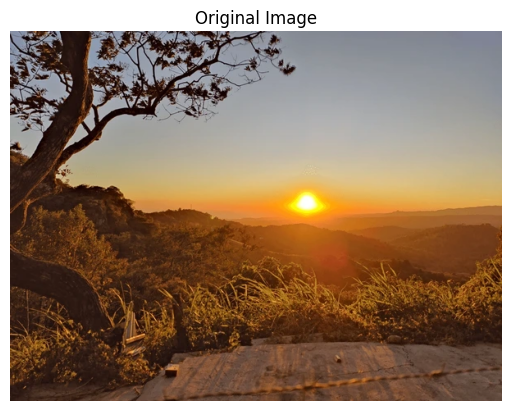

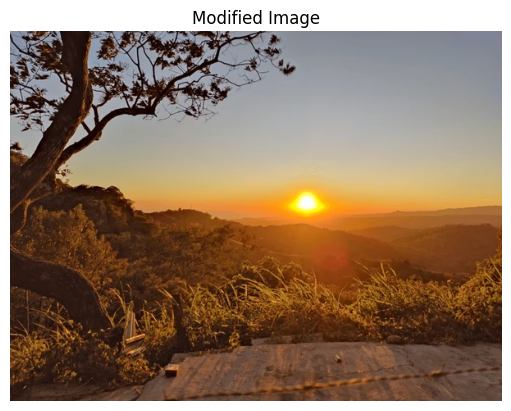

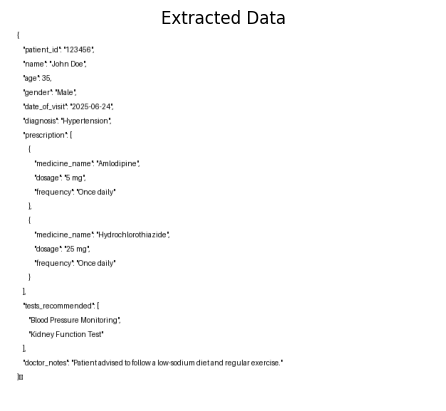

In [9]:
from PIL import Image, ImageDraw, ImageFont
import json
import os
import matplotlib.pyplot as plt
from google.colab import files

# Upload your image
uploaded = files.upload()
user_image = list(uploaded.keys())[0]  # Get uploaded filename dynamically

# Function to embed data into image
def embed_data(image_path, output_path, data):
    img = Image.open(image_path)
    binary_data = ''.join(format(ord(i), '08b') for i in data)
    binary_data += '1111111111111110'  # End-of-data marker
    img_data = list(img.getdata())

    if len(binary_data) > len(img_data) * 3:
        raise ValueError("Data too large to hide in the image.")

    new_data = []
    data_index = 0

    for pixel in img_data:
        r, g, b = pixel
        if data_index < len(binary_data):
            r = (r & ~1) | int(binary_data[data_index])
            data_index += 1
        if data_index < len(binary_data):
            g = (g & ~1) | int(binary_data[data_index])
            data_index += 1
        if data_index < len(binary_data):
            b = (b & ~1) | int(binary_data[data_index])
            data_index += 1
        new_data.append((r, g, b))

    img.putdata(new_data)
    img.save(output_path)
    print(f"✅ Data embedded successfully into '{output_path}'")

# Function to extract hidden data
def extract_data(image_path):
    img = Image.open(image_path)
    img_data = list(img.getdata())

    binary_data = ""
    for pixel in img_data:
        r, g, b = pixel
        binary_data += bin(r)[-1]
        binary_data += bin(g)[-1]
        binary_data += bin(b)[-1]

    all_bytes = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]
    decoded_data = ""
    for byte in all_bytes:
        if byte == "11111110":  # End-of-data marker
            break
        decoded_data += chr(int(byte, 2))

    print("✅ Extracted Data:", decoded_data)
    return decoded_data

# Convert extracted text to image
def text_to_image(text, output_path):
    font = ImageFont.load_default()
    lines = text.splitlines()
    width = 600
    height = 20 * len(lines) + 20

    image = Image.new('RGB', (width, height), 'white')
    draw = ImageDraw.Draw(image)

    for i, line in enumerate(lines):
        draw.text((10, 20 * i), line, font=font, fill='black')

    image.save(output_path)
    print(f"✅ Extracted data saved as image to '{output_path}'")

# Load dummy medical report data
def load_medical_report():
    medical_report = {
        "patient_id": "123456",
        "name": "John Doe",
        "age": 35,
        "gender": "Male",
        "date_of_visit": "2025-06-24",
        "diagnosis": "Hypertension",
        "prescription": [
            {"medicine_name": "Amlodipine", "dosage": "5 mg", "frequency": "Once daily"},
            {"medicine_name": "Hydrochlorothiazide", "dosage": "25 mg", "frequency": "Once daily"}
        ],
        "tests_recommended": ["Blood Pressure Monitoring", "Kidney Function Test"],
        "doctor_notes": "Patient advised to follow a low-sodium diet and regular exercise."
    }
    return json.dumps(medical_report, indent=4)

# ----------- MAIN LOGIC ----------------
# Step 1: Save a copy as 'original.png'
Image.open(user_image).save("original.png")
print("✅ Original image saved as 'original.png'")

# Step 2: Embed data
report = load_medical_report()
embed_data("original.png", "modified.png", report)

# Step 3: Extract and save as image
extracted = extract_data("modified.png")
text_to_image(extracted, "extracted_data.png")

# Step 4: Display results
for title, path in [("Original Image", "original.png"),
                    ("Modified Image", "modified.png"),
                    ("Extracted Data", "extracted_data.png")]:
    img = Image.open(path)
    plt.figure()
    plt.title(title)
    plt.imshow(img)
    plt.axis('off')

plt.show()
